In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from turtle import color
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Data exploration

In [67]:
df = pd.read_csv("ds_salaries.csv")

#### Quic look no data

In [68]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [70]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [71]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

I'm droping Unnamed column we don't need it

In [72]:
df = df.drop(columns="Unnamed: 0")

In [73]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Categorical Columns

##### Sallary in time

In [74]:
df_salary = df[["work_year", "salary_in_usd"]].groupby("work_year").mean()
df_salary_job_title =df[["job_title", "salary_in_usd"]].groupby("job_title").mean()

##### Mean salary in every year

In [75]:
df_salary

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


Job title with max mean

In [76]:
df_salary_job_title.sort_values(by="salary_in_usd", ascending=False).head()

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000


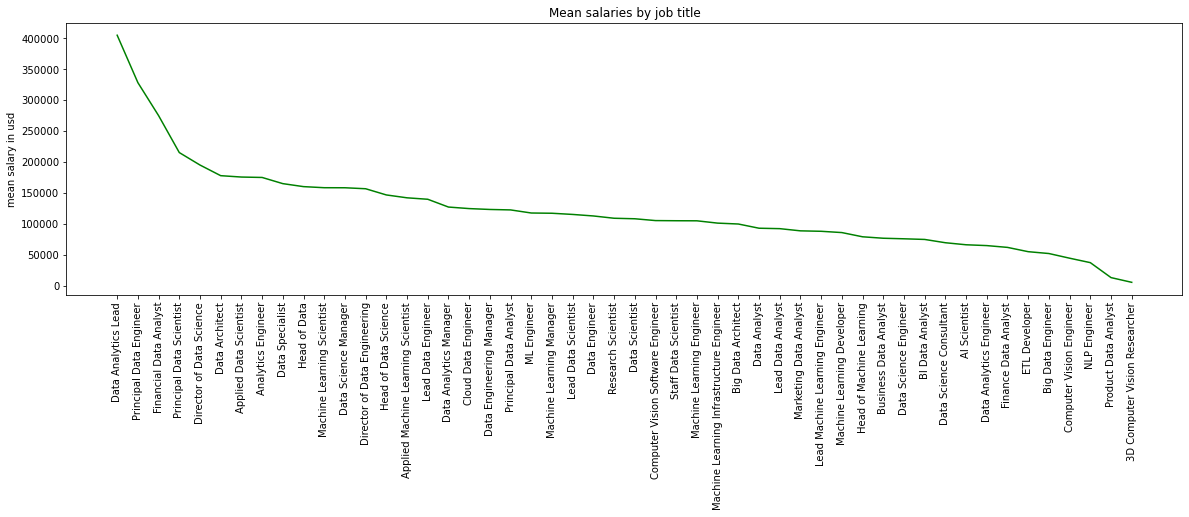

In [77]:
plt.figure(figsize=(20,5))
plt.plot(df_salary_job_title.sort_values(by="salary_in_usd", ascending=False), color="green")
plt.xticks(rotation=90)
plt.title("Mean salaries by job title")
plt.ylabel("mean salary in usd")
plt.show()

##### Job title

In [78]:
qty_of_jobs_title = df["job_title"].value_counts().size

print(f"Quantity of jobs: {qty_of_jobs_title}")

Quantity of jobs: 50


In [79]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

To my analys I'm taking 3 jobs title with the most records

In [80]:
df["job_title"].value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [81]:
df_selected_jobs = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst")]

In [82]:
df_selected_jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L


Basic statistics over all

In [83]:
df_selected_jobs.groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,6072,200000,92893.061856,39961.075848,97
Data Engineer,4000,324000,112725.000000,57629.082107,132
Data Scientist,2859,412000,108187.832168,64112.840519,143


#### Experiance level

SE - Senior \
MI - Mid \
EN - Junior \
EX - Expert 

Basic statistics based on experience

In [84]:
#SENIOR
df_selected_jobs[(df_selected_jobs["experience_level"] == "SE")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,60000,200000,111922.629630,31016.993791,54
Data Engineer,25000,243900,137035.841270,46756.818234,63
Data Scientist,20171,412000,152971.016393,58985.402166,61


In [85]:
#MID
df_selected_jobs[(df_selected_jobs["experience_level"] == "MI")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,8000,167000,71699.206897,37710.835100,29
Data Engineer,4000,206699,85985.660377,44478.317556,53
Data Scientist,2859,200000,82039.133333,46869.579661,60


In [86]:
#JUNOR
df_selected_jobs[(df_selected_jobs["experience_level"] == "EN")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,6072,91000,53960.666667,30232.550698,12
Data Engineer,21637,120000,58933.500000,25523.078710,12
Data Scientist,4000,105000,55330.909091,31237.823453,22


In [87]:
#EXPERT
df_selected_jobs[(df_selected_jobs["experience_level"] == "EX")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,110000,130000,120000,14142.135624,2
Data Engineer,200000,324000,245500,55121.078848,4


In [88]:
df_selected_jobs["experience_level"].value_counts()

SE    178
MI    142
EN     46
EX      6
Name: experience_level, dtype: int64

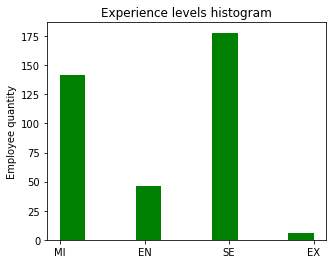

In [89]:
plt.figure(figsize=(5,4))
plt.hist(df_selected_jobs["experience_level"], color="green")
plt.title("Experience levels histogram")
plt.ylabel("Employee quantity")
plt.show();

##### Check remote ratio

In [90]:
df_selected_jobs["remote_ratio"].value_counts()

100    242
0       87
50      43
Name: remote_ratio, dtype: int64

##### Check remote ratio

In [91]:
df_selected_jobs["remote_ratio"].value_counts()

100    242
0       87
50      43
Name: remote_ratio, dtype: int64

In [92]:
df_selected_jobs.groupby("remote_ratio")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
remote_ratio,,,,,
0,2859,220110,97030.655172,52673.683253,87
50,8000,147000,67175.162791,33256.091431,43
100,4000,412000,115830.528926,58156.603987,242


##### Check employment type

In [93]:
df_selected_jobs["employment_type"].value_counts()

FT    365
PT      5
FL      2
Name: employment_type, dtype: int64

In [94]:
df_selected_jobs.groupby("employment_type")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
employment_type,,,,,
FL,20000,100000,60000.000000,56568.542495,2
FT,2859,412000,106806.756164,56633.681560,365
PT,10354,100000,51344.200000,36330.756388,5


In [95]:
df_selected_jobs["employee_residence"].value_counts()

US    230
GB     34
CA     15
FR     12
IN     12
ES     11
DE     10
GR      9
TR      3
PK      3
IT      2
BR      2
RO      2
PL      2
NL      2
NG      2
AT      2
MX      2
JP      2
PH      1
VN      1
RU      1
AU      1
DZ      1
RS      1
HU      1
IR      1
HK      1
BG      1
CL      1
MT      1
SG      1
UA      1
CH      1
Name: employee_residence, dtype: int64

In [96]:
df_dummies = pd.get_dummies(df_selected_jobs[["salary_in_usd", "experience_level"]], columns=['experience_level'])

In [97]:
from sklearn.cluster import KMeans

In [98]:
dataKM = df_dummies[["salary_in_usd"]].copy()

kmean = KMeans(n_clusters= 5, random_state=1).fit(dataKM)
dataKM["cluster"] = kmean.labels_

dataKM.head()

,salary_in_usd,cluster
0,79833,0
5,72000,0
7,35735,2
10,51321,2
11,40481,2


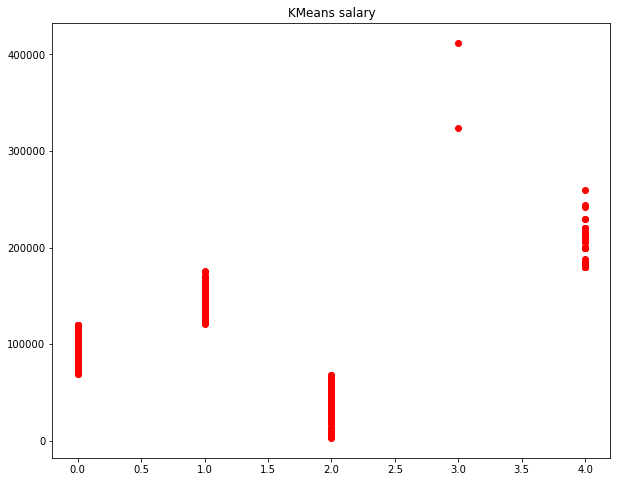

In [99]:
plt.figure(figsize=(10,8))

plt.scatter(dataKM['cluster'], dataKM['salary_in_usd'], color = 'red')
plt.title('KMeans salary');


<AxesSubplot:>

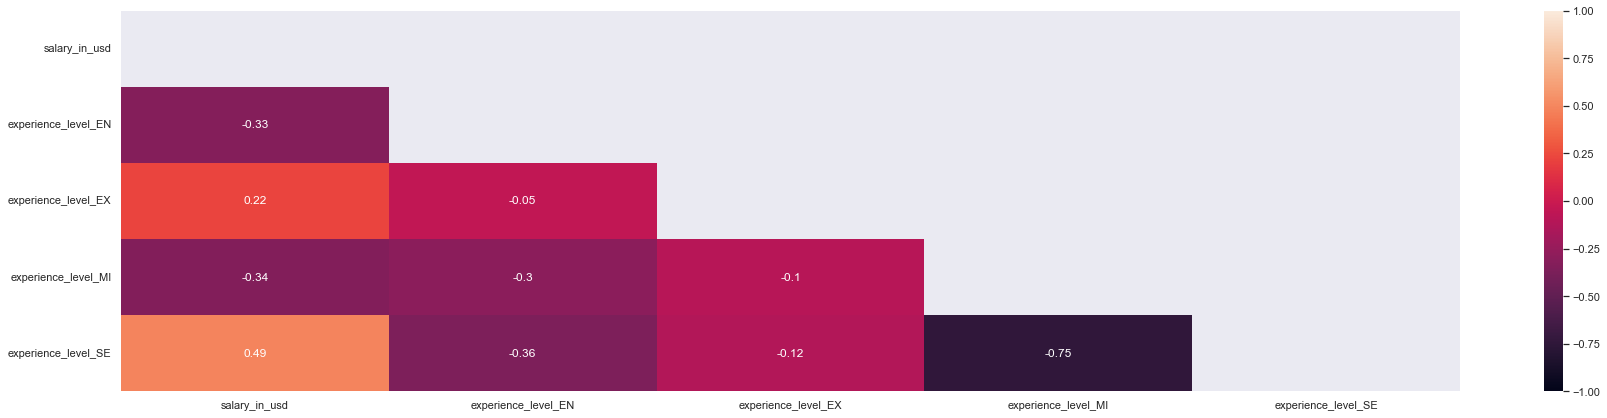

In [100]:
cor = np.round(df_dummies.corr(),2)
sns.set(rc={'figure.figsize':(30,7)})
mask = np.triu(np.ones_like(cor), k=0)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1., vmax=1.)

The strongest correlation is between salary_in_usd and work_year

### Linear regresion

#### Basic model

In [101]:
df_selected_jobs_dummies = pd.get_dummies(df_selected_jobs)
df_selected_jobs_dummies.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,...,company_location_NL,company_location_PK,company_location_PL,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,70000,79833,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,2020,72000,72000,100,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7,2020,11000000,35735,50,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,2020,45000,51321,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11,2020,3000000,40481,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [103]:
df_selected_jobs_dummies = df_selected_jobs_dummies.drop(columns=["salary"])

Train test split

In [104]:
y = df_selected_jobs_dummies["salary_in_usd"].values
x = df_selected_jobs_dummies.drop(columns=["salary_in_usd"])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state= 44, train_size=0.6)

In [106]:
X_train.shape

(223, 94)

In [107]:
X_test.shape

(149, 94)

In [108]:
model = LinearRegression()

In [109]:
model.fit(X_train, y_train)

LinearRegression()

In [110]:
r_sqr_train = model.score(X_train, y_train)
r_sqr_test = model.score(X_test, y_test)

print(f"coefficient of determination on train data:    {r_sqr_train}")
print(f"coefficient of determination on test data:     {r_sqr_test}")

coefficient of determination on train data:    0.623972864932731
coefficient of determination on test data:     0.5829330369414221


##### Grid search

In [120]:
parameters = {'n_jobs' : [1,2,3,4,5,10,12,14,16,20,40,50,100]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.4763219272779972
Residual sum of squares: 1387857342.83


In [121]:
grid.best_params_

{'n_jobs': 1}

In [124]:
modelGS = LinearRegression(n_jobs=1)

In [125]:
modelGS.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [126]:
r_sqr_trainGS = modelGS.score(X_train, y_train)
r_sqr_testGS = modelGS.score(X_test, y_test)

print(f"coefficient of determination on train data:    {r_sqr_train}")
print(f"coefficient of determination on test data:     {r_sqr_test}")

print("GRID SEARCH")
print(f"coefficient of determination on train data:    {r_sqr_trainGS}")
print(f"coefficient of determination on test data:     {r_sqr_testGS}")

coefficient of determination on train data:    0.623972864932731
coefficient of determination on test data:     0.5829330369414221
GRID SEARCH
coefficient of determination on train data:    0.623972864932731
coefficient of determination on test data:     0.5829330369414221
